<a href="https://colab.research.google.com/github/radhika3131/Deep_Learning_with_Python/blob/main/ch_02_The_mathematical_building_blocks_of_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Loading the mnist dataset in keras
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

The network Architecture

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
# Define Sequential model with 3 layers
model = keras.Sequential(
    [
        layers.Dense(512, activation="relu", name="layer1"),
        layers.Dense(10, activation="softmax", name="layer2"),#  it will return an  array of 10 probability score
     # Each score will be the probabilty that the current digit image belongs to one of our 10 digit classes
        
    ]
)

The compilation step(to make model ready for training)

In [ ]:

model.compile(optimizer = "rmsprop",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"]
              )

Preparing data(reshape the data into the shape model expects and scaling it so that all the values are in the [0,1] )

In [ ]:
train_images = train_images.reshape((60000, 28*28)) 
train_images = train_images.astype("float32")/ 255
test_images = test_images.reshape((10000, 28*28)) 
test_images = test_images.astype("float32")/ 255

In [ ]:
 #fitting the model
 model.fit(train_images , train_labels , epochs = 5 , batch_size = 128)

Epoch 1/5
469/469 [==============================] - 6s 11ms/step - loss: 0.2693 - accuracy: 0.9219
Epoch 2/5
469/469 [==============================] - 6s 13ms/step - loss: 0.1086 - accuracy: 0.9679
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0709 - accuracy: 0.9785
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0511 - accuracy: 0.9845
Epoch 5/5
469/469 [==============================] - 9s 19ms/step - loss: 0.0381 - accuracy: 0.9887


In [ ]:
#using model to make prediction
test_digits = test_images[0:10]
predictions  = model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 29ms/step


array([8.0299847e-09, 9.2018837e-11, 2.4462832e-07, 2.8374795e-06,
       7.8059590e-12, 5.2924536e-09, 1.4608333e-12, 9.9999624e-01,
       6.6998398e-09, 6.1418137e-07], dtype=float32)

In [ ]:
predictions[0].argmax()

7

In [ ]:
predictions[0][7]

0.99999624

Evaluvating the model on new data

In [ ]:
test_loss , test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc : {test_acc}")

313/313 [==============================] - 1s 4ms/step - loss: 0.0679 - accuracy: 0.9787
test_acc : 0.9786999821662903


the test- set accuracy turns out to be 97.8% thats a quite bit lower than the training set accuracy(98.9) this gap between training accuracy and testing accuracy is called overfiiting.
till now we have just sawhoe to bulid a simple neural network to classify handwritten digits


#Data Representation for neural networks

Scalars(rank - 0 tensors)

In [ ]:
import numpy as np
x = np.array(12)
x

array(12)

In [ ]:
x.ndim     # this attribute is used for displaying number of axes/dimension of numpy tensor

0

Vector(rank-1 tensor)
an array of numbers

In [ ]:
x = np.array([12,6,14,7,3,])
x

array([12,  6, 14,  7,  3])

In [ ]:
x.ndim

1

Matrices(rank -2  tensors)

In [ ]:
x = np.array([[5,34,2,3,0],
              [5,7,45,32,9],
              [2,6,4,12,5]])
x

array([[ 5, 34,  2,  3,  0],
       [ 5,  7, 45, 32,  9],
       [ 2,  6,  4, 12,  5]])

In [ ]:
x.ndim

2

Rank - 3 and higher-rank tensor
(if you pack some matrices in new array , you obtain a rank -3 tensor)

In [ ]:
x = np.array([[[5,34,2,3,0],
              [5,7,45,32,9],
              [2,6,4,12,5]],
             [[5,34,2,3,0],
              [5,7,45,32,9],
              [2,6,4,12,5]],
             [[5,34,2,3,0],
              [5,7,45,32,9],
              [2,6,4,12,5]]])
x

array([[[ 5, 34,  2,  3,  0],
        [ 5,  7, 45, 32,  9],
        [ 2,  6,  4, 12,  5]],

       [[ 5, 34,  2,  3,  0],
        [ 5,  7, 45, 32,  9],
        [ 2,  6,  4, 12,  5]],

       [[ 5, 34,  2,  3,  0],
        [ 5,  7, 45, 32,  9],
        [ 2,  6,  4, 12,  5]]])

In [ ]:
x.ndim

3

Key Attributes


1.   number of axes
2.   shape
3.   data type








In [ ]:
#To make this more concrete lets look back at the data we proceed in Mnist example, firestw e load dataset
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
#Number of axes in train_images tensor
train_images.ndim

3

In [ ]:
#shape
train_images.shape

(60000, 28, 28)

In [ ]:
#Data type
train_images.dtype


dtype('uint8')

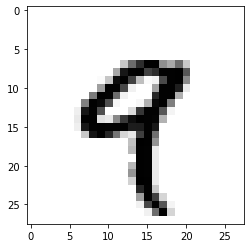

In [ ]:
#displaying the fourth digit
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()

In [ ]:
train_labels[4]

9

Manipulating tensors in numpy

In [ ]:
# tensor- slicing operation
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [ ]:
# Note : is equivalent to selecting the entire axis
my_slice = train_images[10:100 , : ,:] # equivalenet to previous example
my_slice.shape

(90, 28, 28)

In [ ]:
# equivalent to previous example
my_slice = train_images[10:100 , 0:28 ,0:28] 
my_slice.shape

(90, 28, 28)

In [ ]:
# in order to select 14*14 pixels un the bottom right corner of all image you would do this
my_slice = train_images[:,14:,14:] 
my_slice.shape

(60000, 14, 14)

In [ ]:
# in order to crop the images to patches of 14*14 pixls centered in the middle you'd do this
my_slice = train_images[:,7:-7,7:-7] 
my_slice.shape

(60000, 14, 14)

The notation of data Batches
deep learning model do'nt process an entire dataset at once . rather , they break the data into small batches

In [ ]:
batch = train_images[:128]
batch.shape

(128, 28, 28)

In [ ]:
#nth batch
n = 3
batch = train_images[128 * n:128 * (n+1)]
batch.shape

(128, 28, 28)

#The gears of neural networks :Tensor operations

In [ ]:
  # In our initial ex , we built our model by stacking Dense Layers on  top of each other
from tensorflow import keras
from tensorflow.keras import layers
  keras.layers.Dense(512,activation = "relu")



In [ ]:
# This layer can be interpretd as a function,which takes as input a matrix and return another matrix
# output = relu(dot(input,W) + b)
#Here wW is matrix and b is a vector, both attributes of layer

Element wise operation


In [ ]:
#The relu function and addition are element wise operation
# naive python implementaion of an element wise operation

def naive__relu(x):
  assert len(x.shape) == 2
  x = x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i,j] = max(x[i,j],0)
  return x
# you could do samefor addition

Broadcasting

what happen  with addition when the shape of the two tensors being added differ
the smaller tensor  will be  "**broadcast** top match the shape of larger tensor
---- Broadcasting involves two steps:
1. Axes are added  to the smaller tensor to match  the ndim of the larger tensor 
2. the smaller tensor is repeated alogside these new axes to match the full shape of the largr tensor

In [ ]:
 import numpy as np
 X = np.random.random((32,10))#X is random matrix with shape (32,10) 
 y = np.random.random((10,))# y is random vector with shape  ( 10,) 

In [ ]:
# if we add an empty axis to y, whose shape becomes (1,10)
y = np.expand_dims(y , axis = 0)

In [ ]:
# if we repeat y 32 times alongside this new axis, so the we end with  a tensor Y with shape(32,10)
# where Y(i, :) == y for i in range(0,32):

Y = np.concatenate([y] * 32 , axis = 0)
# now we can add X and Y becz they have same shape 

In [ ]:
def naive_add_matrix_and_vector(x,y):
  assert len(x.shape) == 2
  assert len(y.shape) == 1
  assert x.shape[1] == y.shape[0]

  x =x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i, j] += y[j]
  return x


Tensor product
a tensor product is done using np.dot function

In [ ]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x,y)

In [ ]:
# dot product of two vextor x and y 
def naive_vector_dot(x,y):
  assert len(x.shape) == 1
  assert len(y.shape) == 1
  assert x.shape[0] == y.shape
  z = 0.

  for i in range (x.shape[0]):
    z += x[i] * y[i]
  return z

In [ ]:
# dot product of matrix and vector
def naive_matrix_vector_dot(x,y):
  assert len(x.shape) == 2 # x is numpy matrix 
  assert len(y.shape) == 1 # y is numpy vector
  assert x.shape[0] == y.shape[0]# the first dimension of x must be the same as the 0th dimension of y
  z = np.zeros(x.shape[0]) # this operation return a vector of 0s with the same shape as y

  for i in range (x.shape[0]):
    for j in range(y.shape[1]):
      z += x[i,j] * y[j]
  return z


In [ ]:
# dot product of two matrix
def naive_matrix_dot(x,y):
  assert len(x.shape) == 2 # x is numpy matrix 
  assert len(y.shape) == 2 # y is numpy matrix
  assert x.shape[1] == y.shape[0]# the first dimension of x must be the same as the 0th dimension of y
  z = np.zeros(x.shape[0], y.shape[1]) # this operation return a vector of 0s with the same shape as y

  for i in range (x.shape[0]):
    for j in range(y.shape[1]):
      row_x = x[i,j]
      column_y = y[:,j]
      z[i,j] = naive_vector_dot(row_x,column_y)
  return z

Tensor reshaping


Reshaping a tensor means rearranging its rows and columns to match a target shape

In [ ]:
x = np.array([[0.,1],
              [2.,3],
              [4.,5]])
x.shape

(3, 2)

In [ ]:
x = x.reshape((6,1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [ ]:
# special case of reshaping thats commonly encountered as transposition
# transposing a matrix means exchanging its rows with columns sp that [i , :] becomes x[:,i]
x = np.zeros((300,20))
x = np.transpose(x)
x.shape

(20, 300)

cratch in TensorFlow

#Reimplmenting our first example from scratch in TensorFlow

 simple python class , NaiveDense thats create two tensorflow variales W and b and exposes a __call__() method that applies the preceding transformaton

In [ ]:

import tensorflow as tf
class NaiveDense:
  def __init__(self, input_size , output_size , activation):
    self.activation = activation

    w_shape = (input_size , output_size) # create a matrix
    w_initial_value = tf.random.uniform(w_shape, minval = 0 , maxval = 1e-1)
    self.W = tf.Variable(w_initial_value)

    b_shape =(output_size) # create a vector b o shape(out_size), initiated with zeros
    b_initila_value = tf.zeros(b_shape)
    self.b = tf.Variable(b_initila_value)

  def __call__(self, inputs): # apple the forward bias
    return self.activation(tf.matmul(inputs, self.W) + self.b)

  @property
  def weights(self): # convienece method for retrieving the layers method
    return (self.W, self.b)

    

lets create a NaiveSequential class to chain these layers. It wraps a list of layers and expose a __call___() method that simply calls the underlying layers on the inputs
 it also features a weights property to easily keep track of the layers parameters


In [ ]:

class NaiveSequential:
  def __init__(self, layers):
    self.layers = layers

  def __call__(self, inputs):
    x = inputs
    for layer in self.layers:
      x= layer(x)
    return x

  @property
  def weights(self):
    weights = []
    for layer in self.layers:
      weights += layer.weights
    return weights

using this NaiveDense class and Naivesequential class, we can create a mock keras model 


In [ ]:


model = NaiveSequential([
    NaiveDense(input_size = 28*28 , output_size = 512 , activation = tf.nn.relu), 
    NaiveDense(input_size = 512 , output_size = 10, activation = tf.nn.softmax)
])

assert len(model.weights) == 4

 we need a way to iterate over the MNISt data in mini batches

In [ ]:


import math

class BatchGenerator:
  def __init__(self, images , labels , batch_size = 128):
    assert len(images) == lan(labesl)
    self.index = 0
    self.labels =labels
    self.images = images
    self.batch_size = batch_size
    self.num_batches = math.cell(len(images) / batch_size)

  def next(self):
    images = self.images[self.index  : self.index + self.batch_size]
    labels = self.labels[self.index  : self.index + self.batch_size]
    return images , labels

Running one training step ⁉

The most difficult  part of the process is the **training step** updating the weights of the model after running it on one batch of data . we need to:


1.   Compute the prediction of the model for the images in the batch
2.   Compute the loss value for these prediction , given the actual label
3.   compute the gradient of the loss ith regard to the model's weight
4.   Move the weight by a small amount in the direction opposite to the gradient



In [ ]:
from numpy.lib.function_base import gradient
def one_taining_step(model, image_batch , labels_batch):
  with tf.Gradienttape() as tape:
    predictions = model(images_batch)  
    per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(labels_batch , predictions)
    average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss , model.weights) # compute the gradient of the loss with regard to the wights . The output gradients is a list where eaach entry corresponds to a weight from the modl.weights list
    update_weights(gradients , model.weights) # update the weights using gradient 
    return average_loss

  learning_rate = 1e-3
  def update_weights(gradients , weights):
     for g , w in zip(gradients , weights):
       w.assign_sub(g ** learning_rate) # assign_sub is the equivalent of .= for TensorFlow variables

# In practice you would  almost never implement a weight update step like this by hand , Instead you would use an optimizer instance from keras
from tensorflow.keras import optimizers
optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients , weights):
  optimizer.apply_gradient(zip(gradient, weight))

The full training Loop

An epoch of training simply consists of repeating the training step for each batch in the training data ,and the full training loop is simply te reptition of one epoch

In [ ]:
def fit(model , images , labels , epoches , batch_size = 128):
  for epoch_counter in range(epoches):
    print(f"Epoch {epoch_counter}")
    batch_generator = BatchGenerator(images , labels)
    for batch_counter in range(batch_generator.num_batches):
      images_batch , labels_batch = batch_generator.next()
      loss = one_training_step(model , images_batch , labels_batch)
      if batch_counter % 100 ==0:
        print(f"loss at batch {batch_counter} : {loss: 2f}")

Evaluating the model 

we can evaluate the model by taking the argmax of its prediction  over the test images and comparing it to the expected labels

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images , train_labels) , (test_images , test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype("float32")/ 255
test_images = test_images.reshape((10000, 28*28)) 
test_images = test_images.astype("float32")/ 255

fit(model , train_images. train_labels , epoches = 10 , batch_size = 128)

In [ ]:
predictions = model(test_images)
predictions = predictions.numpy() # calling .numpy() on a TensorFlow  tesnor convrt it into a numpy tensor
prediction_labels = np.argmax(predictions , axis = 1)
matches = prediction_labels == test_labels
print(f"accuracy :{matches.mean(): 2f}")